In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\egorm\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# **Data understanding**

In [2]:
in_data = pd.read_csv('Данные о вводе товаров в оборот.csv')

In [3]:
transfers_data = pd.read_csv('Данные о перемещениях товаров между участниками.csv')

In [4]:
out_data = pd.read_csv('Данные о выводе товаров из оборота.csv')

In [5]:
products_manual = pd.read_csv('Справочник продукции.csv')
outlets_manual = pd.read_csv('Справочник торговых точек.csv')
volumes_manual = pd.read_csv('Справочник участников оборота товаров.csv')

In [6]:
products_manual.head()

,gtin,inn,product_name,product_short_name,tnved,tnved10,brand,country,volume
0,8C414C7757D587886C10DB0CCEA641A2,D0B1FE981FCC19F934C3FFD91690430F,68F60FA530914522B26E25F262EBC6D6,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,58A4B52373651DA4292AD5725D388F8A,D2D1641B196DA5477D40C0907FD5F1DA,NaN,10
1,3D8C701836C4C0A5B33D57522A7EDBAB,9B0AFDA27FCCB188768FA9B611183387,670017E2D871B8962E5456CA71F6A1D1,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,58A4B52373651DA4292AD5725D388F8A,670017E2D871B8962E5456CA71F6A1D1,NaN,НЕ КЛАССИФИЦИРОВАНО
2,B1308C75C38993B0EEA22C8FE2899C2A,86CAE1EAD8AF200ED46453FD18FA1A04,97181A85E3400C38AB223F17A5DCCFCC,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,ABB51261177B26E23AC2DE0F0508D6AB,NaN,100
3,1D71E57CA201A8ACEADBAA8D6E7039DE,86CAE1EAD8AF200ED46453FD18FA1A04,EA5CEDF8FA0F5BEBD2F047151B2DBE86,B8AF2335E04E7BAD5168D9B39FABAC21,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,EDFFD44E0EC18764685E952553560EEF,NaN,100
4,5DEF4AA62907D322F85FA88839F00E8F,86CAE1EAD8AF200ED46453FD18FA1A04,75AF532015CFA92F71FF54ADEDB9BEA3,9199AB529CF62D4BDB7E8B1D7459001D,6D2580183CEF6C8AF1CC72E1C6E6FBC4,FAEA36DABA0E46CD081A7FA49DAD8FE0,75AF532015CFA92F71FF54ADEDB9BEA3,NaN,50


In [7]:
outlets_manual.head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
0,C72AC534DBF5E6369840FFE9DA9FF403,0056F9FCFA009E493BEFEAE4FAA71D82,51,NaN,NaN,184421.0
1,591942644AE25AE4DD26CF943BB97414,81AAC456284F455FC2B141E6E8F1A76C,66,г Екатеринбург,2763c110-cb8b-416a-9dac-ad28a55b4402,620027.0
2,A6E2261F16F84FF09E2B615EDB008943,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390026.0
3,DC3B647A089FA064DE61E0C778F5EE45,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390017.0
4,D2F125BAA947B6293CD055DA1DEEA87D,87C2FDB73C26C96266A0947C2BB714BF,62,г Рыбное,91d71d8c-2f1a-43c8-bc84-d78dc4245a1b,391112.0


In [8]:
volumes_manual.head()

,inn,region_code
0,60DFB6F87ABF6232A5D97A1A827F8D88,1
1,2D13C279C7CEC509D21695F0268ECCEA,1
2,1705C73792D7A1A5ABDF1883FE851004,1
3,B4CC35BD7D8F69E665160F548EBE125D,23
4,2DB318BEA4A44280FA488A0B2AF36254,1


In [9]:
in_data.head()

,dt,inn,gtin,prid,operation_type,cnt
0,2021-11-22,F0C677A146366202906368AF9FCEC188,C238E7C33B56BA911F576777316EC9F2,F0C677A146366202906368AF9FCEC188,Импорт. Не ЕАЭС,6
1,2021-11-22,F0DC262C40FBA363CFCEF8005E4C6140,4D3423957ECDC40F70E37EB75A6A2D3E,F0DC262C40FBA363CFCEF8005E4C6140,Перемаркировка,10
2,2021-11-22,32D845A9CC2A5BFA9F77CAE0E9A905A5,F1931263F03E1D89A43A3633AAF9FB84,32D845A9CC2A5BFA9F77CAE0E9A905A5,Импорт. Не ЕАЭС,600
3,2021-11-22,CE816FDF82B121C67CAE9B79203B8BA1,0374D8CAC82E9F0D47C95FA13D68C7C6,CE816FDF82B121C67CAE9B79203B8BA1,Импорт. Не ЕАЭС,1860
4,2021-11-22,E34F3F6C9E49FE46C87D067306AAC29B,BBC31CA374A30B34CAFBFD027888A73D,E34F3F6C9E49FE46C87D067306AAC29B,РФ,1


In [10]:
transfers_data.head()

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
0,2021-11-22,867FDFE9E03925792F329DEDBAA3955F,9246A2BE043136FC4B4A166BB0E25D3E,2E55013259E009F4FC1E5EFCF170EA8B,8D5F8E7D20AD9A8D0E8EE5769321D8C3,1
1,2021-11-22,4FB53B945150E362C307D60297066562,9246A2BE043136FC4B4A166BB0E25D3E,32B53198A919C559CB84DC0487947E80,EDE6F6D21300D96A9E207EA4F59321EF,1
2,2021-11-22,38BA9B93C5C987770AD698646D2FAB66,2DADC5DF60A9FC194A3388C1612CC967,3A87113AC25EFD88BD3407ACECFA3869,D02A2294DDF3BCF7218D6FEFDB35A906,1
3,2021-11-22,FA77213DA058666C6781164754CBC0EB,FFC432B34974A68B2845FBED9A7DEB29,C5CDC4F467B7CDA0F3E082BFFEDA9938,051C7D77FE590C5428DB57FD48C5DB9C,3
4,2021-11-22,E5635C538FE51D88504CE5CFF8BC1D2C,6E536425E534ABA7AB9FEA2ACA91A775,AE7F5C67298A67CACD2A193C9405524F,0D28C0E0C8ADAA3D9B55B557C71D8A8E,2


In [11]:
out_data.head()

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2021-11-22,5A3E5F7B2D093D1D6CB3CF93BA9AC8A6,DC7432556B58D454B4E37F0F0D1E663D,B035ED5D308BC70E5EA9342B6DBF5810,19485F700068E6A9A8593AFDE9803638,Продажа конечному потребителю в точке продаж,3500,1
1,2021-11-22,9A2202A48FC5E462C44B78B0C79E1DBD,D18B1B470E57871FAB5B4E949E256BB4,DD486FED86564603D2CD7CF9EED2C458,C2969A4C8A40C12902EAD4936E303045,Продажа конечному потребителю в точке продаж,56714,1
2,2021-11-22,877ABE9DE14E0B510DFC8DE63EEFA817,62B5EAEF59E6693F44B1074C1140BF45,62B5EAEF59E6693F44B1074C1140BF45,5637334F301773E28AE8730713E6D5F7,Продажа конечному потребителю в точке продаж,74314,1
3,2021-11-22,B004F889F17F8AB365C494B3D0D06E1A,D7326D87A37D73AF19AF53668A7116D6,D7326D87A37D73AF19AF53668A7116D6,0FF56DEC16050D3B6372F2CB1BD6DFCB,Продажа конечному потребителю в точке продаж,4999,1
4,2021-11-22,E1C0503EA9201D56D7173CB4CA4A6AFA,50955BB0B97298EEAEB1F6CF9712F37A,39FFA592BE77CA7DE37C65C1B8423E8C,9E660AA1DE428BA88D1942DB2824BDAB,Продажа конечному потребителю в точке продаж,29857,1


In [12]:
products_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393467 entries, 0 to 393466
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   gtin                393467 non-null  object
 1   inn                 393467 non-null  object
 2   product_name        393467 non-null  object
 3   product_short_name  393467 non-null  object
 4   tnved               393467 non-null  object
 5   tnved10             393467 non-null  object
 6   brand               393467 non-null  object
 7   country             71651 non-null   object
 8   volume              310281 non-null  object
dtypes: object(9)
memory usage: 27.0+ MB


In [13]:
outlets_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58401 entries, 0 to 58400
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_sp_          58401 non-null  object 
 1   inn             58401 non-null  object 
 2   region_code     58401 non-null  int64  
 3   city_with_type  39625 non-null  object 
 4   city_fias_id    39625 non-null  object 
 5   postal_code     58365 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [14]:
volumes_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23472 entries, 0 to 23471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   inn          23472 non-null  object
 1   region_code  23472 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 366.9+ KB


In [15]:
in_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740584 entries, 0 to 740583
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   dt              740584 non-null  object
 1   inn             740584 non-null  object
 2   gtin            740584 non-null  object
 3   prid            740584 non-null  object
 4   operation_type  740584 non-null  object
 5   cnt             740584 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 33.9+ MB


In [16]:
transfers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8859258 entries, 0 to 8859257
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   dt            object
 1   gtin          object
 2   prid          object
 3   sender_inn    object
 4   receiver_inn  object
 5   cnt_moved     int64 
dtypes: int64(1), object(5)
memory usage: 405.5+ MB


In [17]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52095181 entries, 0 to 52095180
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   dt              object
 1   gtin            object
 2   prid            object
 3   inn             object
 4   id_sp_          object
 5   type_operation  object
 6   price           int64 
 7   cnt             int64 
dtypes: int64(2), object(6)
memory usage: 3.1+ GB


# **EDA**

In [18]:
in_data['gtin'].nunique()

116536

In [19]:
transfers_data['gtin'].nunique()

81190

In [18]:
out_data['gtin'].nunique()

242922

In [23]:
in_data['gtin'].value_counts().head(10)

251A30759BA28AAAF4CDE47A5475764B    707
7281136266A60B8BB097E57F2E357C99    632
C8A236B3761EA58F38BCF6B4206886C9    613
E63E6A2A32F2D51B6E9EE6785A8325F6    601
1AF3D5B9E053CBDF908FB967FE3543AA    588
65E0021944DBAD3268CE9462CB7D7238    584
DCDADB11B380F3755BD81DA60929843B    580
08653E3EC427B12ED005C9003E8403C9    561
51922339FDB40BD4A827F09092253DE4    548
8050918E9401167F2E925F5B845818B5    546
Name: gtin, dtype: int64

In [22]:
out_data['gtin'].value_counts().head(10)

1248F88441BCFC563FB99D77DB0BB80D    728678
289AEBCA82877CB19E7AA33E0E522883    350900
BB9D92ABF430CD193E3A35540D1B35CE    214463
1AF3D5B9E053CBDF908FB967FE3543AA    207795
3F2FB695D4F981545902C4700A03BEF2    205492
7281136266A60B8BB097E57F2E357C99    201196
064592BF672D421BBDAE2BA0C506877B    180619
9B26E987BBD6BD4A74C06197571600CA    178555
7EE27D63B80EB4BC9F98D9116F87A583    159371
857D9466AD13EC65405A82632FFCBF4E    158180
Name: gtin, dtype: int64

In [19]:
#out_data[out_data['gtin'] == '5A3E5F7B2D093D1D6CB3CF93BA9AC8A6']

In [20]:
out_data['cnt'].nunique()

2613

In [21]:
out_data['dt'] = pd.to_datetime(out_data['dt'])

In [22]:
out_data['total'] = out_data['price'] * out_data['cnt']

In [23]:
out_data = out_data[['dt', 'total']]

In [24]:
out_data['dt'].dt.year.unique()

array([2021, 2022], dtype=int64)

In [25]:
out_data = out_data.set_index('dt').sort_index()

In [26]:
out_data = out_data.resample('1D').sum()

In [33]:
out_data.head()

,total
dt,
2021-11-22,4224950185
2021-11-23,4887946747
2021-11-24,4814967306
2021-11-25,5343075419
2021-11-26,7954615313


In [34]:
out_data.to_csv('out_data.csv')

In [31]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-11-22 to 2022-11-21
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [28]:
decomposed = seasonal_decompose(out_data['total'])

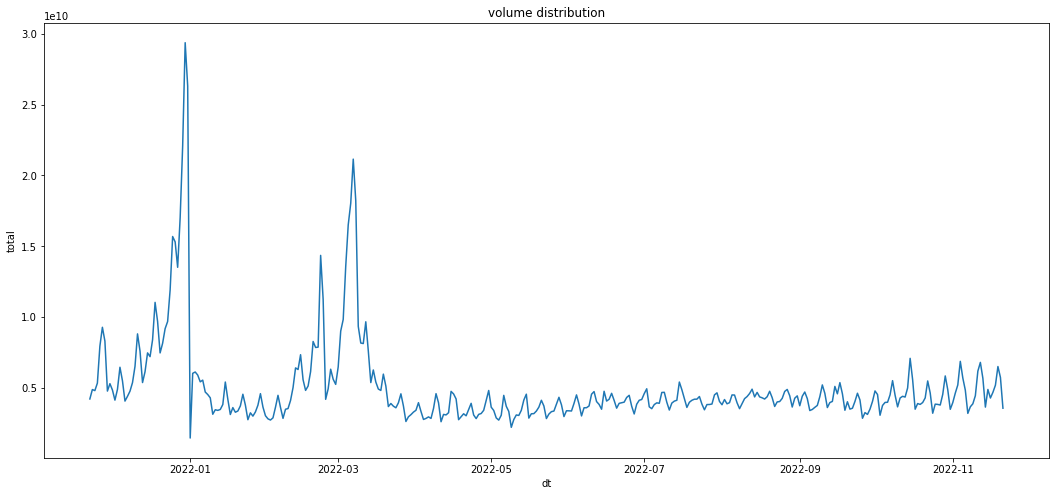

In [35]:
plt.figure(figsize=(18, 8))

sns.lineplot(x=out_data.index, y=out_data['total'])
plt.title('volume distribution')

plt.show()

# **EDA cnt**

In [44]:
out_data = out_data[['dt', 'cnt']]

In [45]:
out_data['dt'] = pd.to_datetime(out_data['dt'])

In [46]:
out_data = out_data.set_index('dt').sort_index()

In [47]:
out_data = out_data.resample('1D').sum()

In [48]:
out_data.head()

,cnt
dt,
2021-11-22,281364
2021-11-23,516521
2021-11-24,419349
2021-11-25,443447
2021-11-26,535558


In [36]:
in_data = in_data[['dt', 'cnt']]

In [38]:
in_data['dt'] = pd.to_datetime(in_data['dt'])

In [39]:
in_data = in_data.set_index('dt').sort_index()

In [40]:
in_data = in_data.resample('1D').sum()

In [49]:
in_data.head()

,cnt
dt,
2021-11-22,996099
2021-11-23,598669
2021-11-24,549166
2021-11-25,721982
2021-11-26,470985


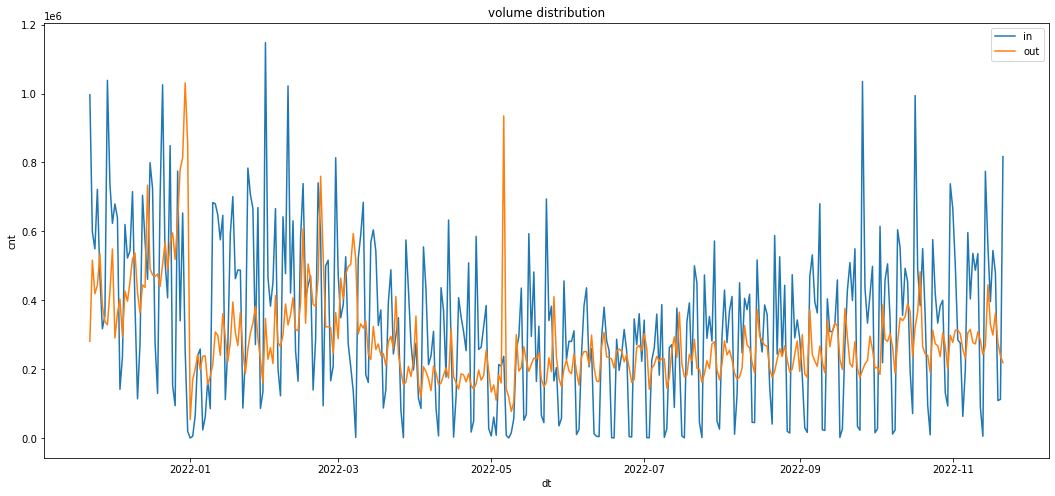

In [56]:
plt.figure(figsize=(18, 8))

sns.lineplot(x=in_data.index, y=in_data['cnt'], label='in')
sns.lineplot(x=out_data.index, y=out_data['cnt'], label='out')
plt.title('volume distribution')
plt.legend()

plt.show()